# Obesity Status Based on Eating Habits and Physical Condition
by Anam Khan, Farah Mallah, Liis Usin, Reihaneh Sadraei

## Explore the data
Loading the dataset and displaying basic information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data set and check the values present

data = pd.read_csv('ObesityDataSet.csv', delimiter=',')
print(str(data.shape[0])+' rows,', len(data.columns), 'columns')
data.sample(5)

2111 rows, 17 columns


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1360,Male,30.796260,1.789421,109.599453,yes,yes,2.214980,2.282392,Sometimes,no,1.179942,no,1.771754,0.537659,Sometimes,Automobile,Obesity_Type_I
159,Male,27.000000,1.640000,78.000000,yes,yes,2.000000,1.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Frequently,Automobile,Overweight_Level_II
944,Male,26.288417,1.767806,82.694689,yes,yes,1.947405,3.118013,Sometimes,no,2.136159,no,0.783963,0.888680,no,Public_Transportation,Overweight_Level_I
1824,Female,25.908431,1.607128,103.026858,yes,yes,3.000000,3.000000,Sometimes,no,1.077253,no,0.162083,0.824607,Sometimes,Public_Transportation,Obesity_Type_III
997,Female,23.000000,1.668649,80.458343,yes,yes,2.000000,2.256119,Sometimes,no,1.142873,no,0.807076,1.611271,no,Public_Transportation,Overweight_Level_II


In [3]:
# check if any none/null values

data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [4]:
# basic information about each columns and its dataset
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

### Below we will separate the obesity types into 2 different categories, as overweight and not overweight

In [6]:
# the column to analyze and to categorize
column_name = 'NObeyesdad'

# Get the unique non-numerical values and their counts in the specified column
unique_values_count = data[column_name].value_counts()

# Get the total number of unique non-numerical values
total_unique_values = unique_values_count.shape[0]

print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
print("Value counts:")
print(unique_values_count)

Total unique non-numerical values in 'NObeyesdad': 7
Value counts:
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64


In [7]:
# the column to analyze
column_name = 'CAEC'

# Get the unique non-numerical values and their counts in the specified column
unique_values_count = data[column_name].value_counts()

# Get the total number of unique non-numerical values
total_unique_values = unique_values_count.shape[0]

print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
print("Value counts:")
print(unique_values_count)

Total unique non-numerical values in 'CAEC': 4
Value counts:
Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64


In [8]:
# # Classify the set into 2 categories
# def classify_overweight(weight_status):
#     overweight_classes = [
#         'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III',
#         'Overweight_Level_I', 'Overweight_Level_II']
#     if weight_status in overweight_classes:
#         return 'Overweight'
#     else:
#         return 'Not Overweight'

In [9]:
# Create a DataFrame from the data
df = pd.DataFrame(data)

In [10]:
# Apply the function to create a new column
# df['Status'] = df['NObeyesdad'].apply(classify_overweight)

In [11]:
# drop the old column
# df = df.drop('NObeyesdad', axis=1)

In [12]:
# check the data again
df.sample(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1539,Male,30.710511,1.914186,129.852531,yes,yes,2.197261,3.0,Sometimes,no,1.111840,no,0.906843,0.976473,Sometimes,Public_Transportation,Obesity_Type_II
1897,Female,20.327723,1.782714,154.618446,yes,yes,3.000000,3.0,Sometimes,no,2.319559,no,1.970730,0.768375,Sometimes,Public_Transportation,Obesity_Type_III
267,Male,38.000000,1.700000,78.000000,no,yes,3.000000,3.0,Frequently,no,2.000000,no,0.000000,0.000000,Frequently,Automobile,Overweight_Level_II
201,Female,41.000000,1.540000,80.000000,yes,yes,2.000000,3.0,Always,no,1.000000,no,0.000000,0.000000,Sometimes,Automobile,Obesity_Type_I
752,Male,21.142432,1.855353,86.413388,yes,yes,2.000000,3.0,Sometimes,no,1.345298,no,1.097905,1.000000,Sometimes,Public_Transportation,Overweight_Level_I


In [13]:
# # the column to analyze
# column_name = 'Status'

# # Get the unique non-numerical values and their counts in the specified column
# unique_values_count = data[column_name].value_counts()

# # Get the total number of unique non-numerical values
# total_unique_values = unique_values_count.shape[0]

# print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
# print("Value counts:")
# print(unique_values_count)

## Visualize relationships / plot the data

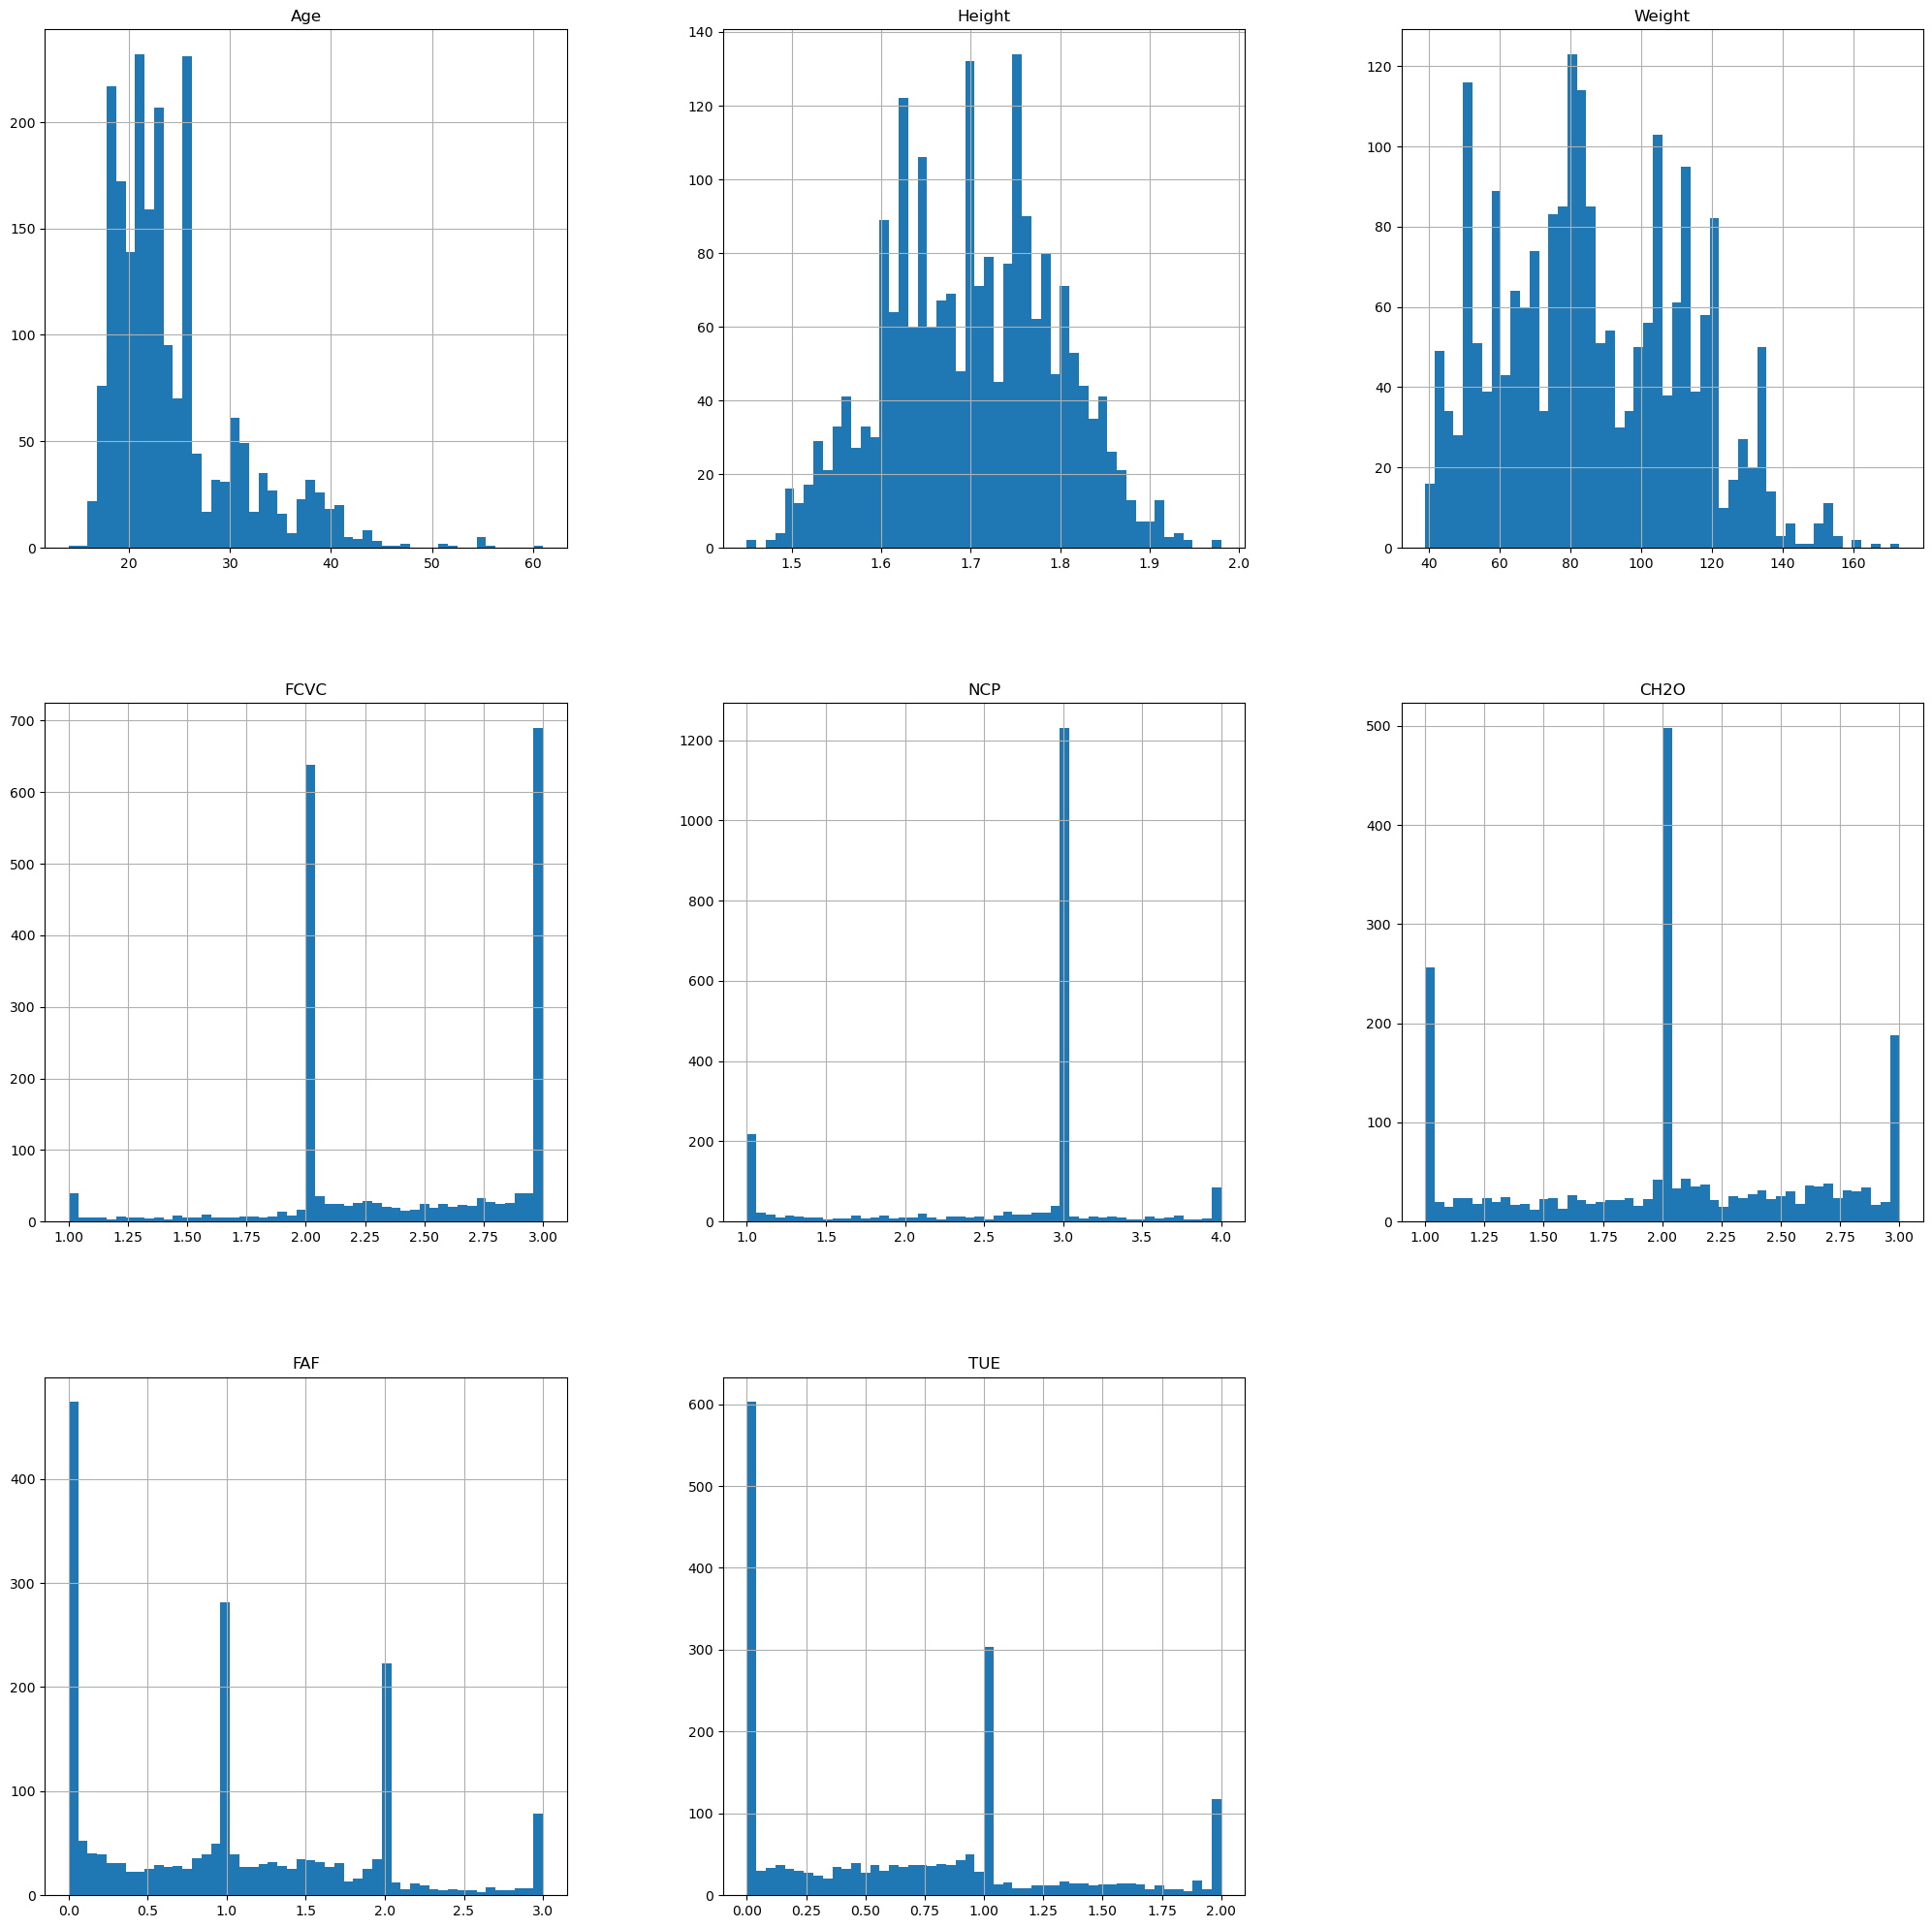

In [14]:
%matplotlib inline
data.hist(bins=50, figsize=(25,25))
plt.show()

In [15]:
df.replace({"NObeyesdad":{        
    "Obesity_Type_III":6, # HIGHEST risk
    "Obesity_Type_II":5,
    "Obesity_Type_I":4,
    "Overweight_Level_II":3,
    "Overweight_Level_I":2,
    "Normal_Weight":1,
    "Insufficient_Weight":0, # lowert risk
}},inplace=True)

The attributes related with the eating habits are:
- Frequent consumption of high caloric food (FAVC),
- Frequency of consumption of vegetables (FCVC),
- Number of main meals (NCP),
- Consumption of food between meals (CAEC),
- Consumption of water daily (CH20),
- and Consumption of alcohol (CALC).

The attributes related with the physical condition are:
- Calories consumption monitoring (SCC),
- Physical activity frequency (FAF),
- Time using technology devices (TUE),
- Transportation used (MTRANS),

C:\Users\anama\AppData\Local\Temp\ipykernel_32360\1557741662.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

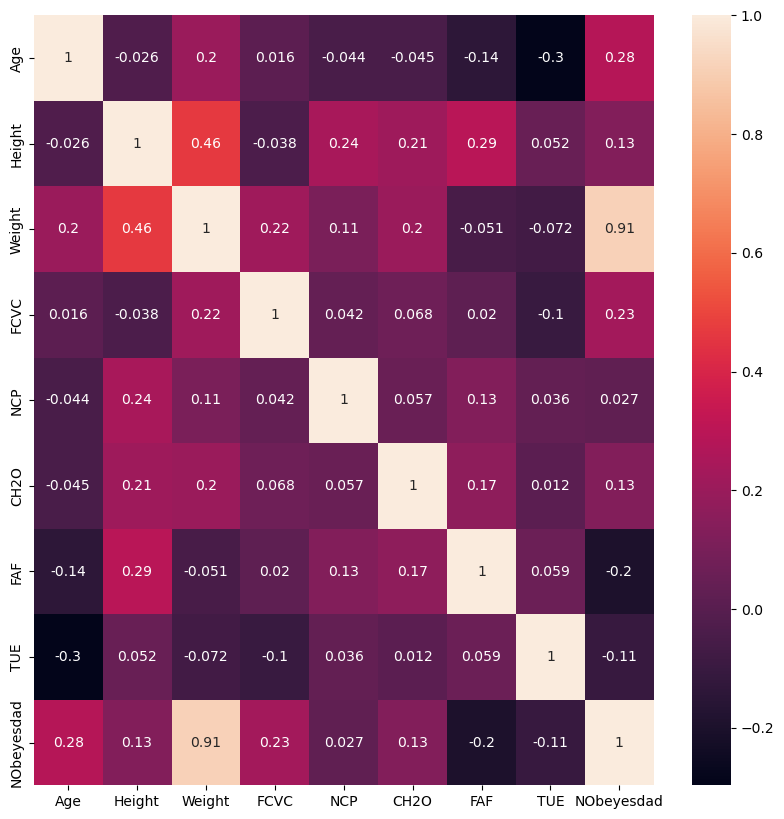

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
corr = data.corr()
sns.heatmap(corr, annot=True)

## Prepare the data
Preparing the data for modeling by handling missing values, encoding categorical features, scaling features, and splitting the data into training and testing sets.

In [17]:
# separating the last column from the rest

# BASED ON WEIGHT
df.drop(columns="NObeyesdad", inplace=True)
print(df)
X_original=df.drop(columns="Weight")
y=df["Weight"]

      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

In [18]:
# # Base on label
# X_original=df.drop(columns="NObeyesdad")
# y=df["NObeyesdad"]

In [19]:
# split data to numerical and categorical way

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

def prepare_data(X):
    numeric_columns = X.select_dtypes(exclude='object').columns
    categorical_columns = X.select_dtypes(include='object').columns

    numeric_features = Pipeline([
        ('handlingmissingvalues',SimpleImputer(strategy='median')),
        ('scaling',StandardScaler(with_mean=True))
    ])

    categorical_features = Pipeline([
        ('handlingmissingvalues',SimpleImputer(strategy='most_frequent')),
        ('encoding', OneHotEncoder()),
        ('scaling', StandardScaler(with_mean=False))
    ])

    processing = ColumnTransformer([
        ('numeric', numeric_features, numeric_columns),
        ('categorical', categorical_features, categorical_columns)
    ])

    return processing.fit_transform(X)



# NOTE - add something here that's for regression...



In [20]:
X=prepare_data(X_original)
X

array([[-0.52212439, -0.87558934, -0.7850187 , ...,  0.        ,
         2.30468953,  0.        ],
       [-0.52212439, -1.94759928,  1.08834176, ...,  0.        ,
         2.30468953,  0.        ],
       [-0.20688898,  1.05402854, -0.7850187 , ...,  0.        ,
         2.30468953,  0.        ],
       ...,
       [-0.28190933,  0.54167211,  1.08834176, ...,  0.        ,
         2.30468953,  0.        ],
       [ 0.00777624,  0.40492652,  1.08834176, ...,  0.        ,
         2.30468953,  0.        ],
       [-0.10211908,  0.39834438,  1.08834176, ...,  0.        ,
         2.30468953,  0.        ]])

## Create Training and Test set

In [21]:
# splitting to training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train X dataset shape:',X_train.shape)
print('Train y dataset shape', y_train.shape)
print('Test X dataset shape:',X_test.shape)
print('Test y dataset shape', y_test.shape)

Train X dataset shape: (1688, 30)
Train y dataset shape (1688,)
Test X dataset shape: (423, 30)
Test y dataset shape (423,)


## Helper function

In [22]:
def evaluate_the_model(y_test, y_pred):
    # Evaluating the model

    # Mean Absolute Error (MAE):
    # average absolute difference between the predicted and actual values
    mae = mean_absolute_error(y_test, y_pred)

    # Mean Squared Error (MSE):
    # Performance of a predictive model - the smaller the value the better
    mse = mean_squared_error(y_test, y_pred)

    # Root Mean Squared Error (RMSE):
    # emphasizes larger errors
    rmse = math.sqrt(mse)

    # R-squared (R2):
    # fit of a regression model ~0.8 is good, but not great 
    r2 = r2_score(y_test, y_pred)

    # Mean Absolute Percentage Error (MAPE):
    # percentage difference between the predicted and actual values
    mape = (1/len(y_test)) * sum(abs((y_test - y_pred) / y_test)) * 100
    
    
    print("Mean Absolute Error (MAE) %.2f:" % mae)
    print("Mean Squared Error (MSE) %.2f:" % mse)
    print("Root Mean Squared Error (RMSE) %.2f:" % rmse)
    print("R-squared Score (R^2) %.2f:" % r2)
    print("Mean Absolute Percentage Error (MAPE) %.2f:" % mape)

In [23]:
def display_residualplot(residuals, y_pred):
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Residual Plot')
    plt.show()

# Build ML models

## Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import math

In [25]:
# Creating and training the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

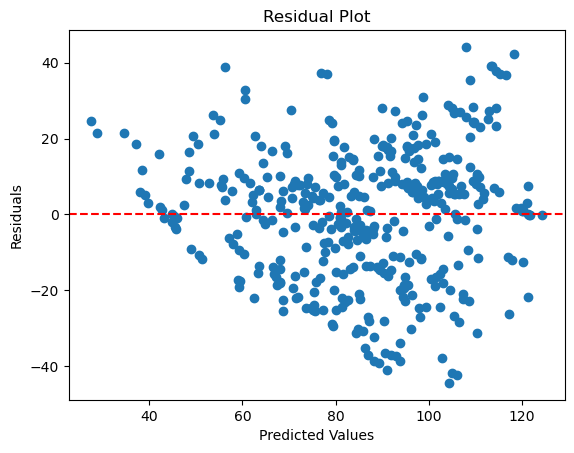

Mean Absolute Error (MAE) 13.82:
Mean Squared Error (MSE) 296.78:
Root Mean Squared Error (RMSE) 17.23:
R-squared Score (R^2) 0.58:
Mean Absolute Percentage Error (MAPE) 17.96:


In [26]:
y_pred1 = linear_model.predict(X_test)
residuals1 = y_test - y_pred1
display_residualplot(residuals1, y_pred1)
evaluate_the_model(y_test, y_pred1)

In [27]:
# OUTLIERS's need to be removed???!

# XGBoost

In [28]:
# !pip install xgboost
import xgboost as xgb

In [29]:
# Creating and training a XG-Boost model

xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [30]:
# Making predictions

y_pred4 = xgb_regressor.predict(X_test)

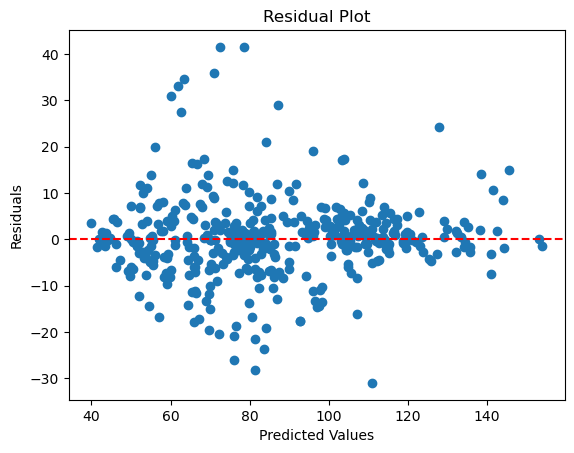

In [31]:
# Scatter plot of predicted values vs. residuals

residuals4 = y_test - y_pred4
display_residualplot(residuals4, y_pred4)

In [32]:
def actual_vs_predicted(y_test, y_pred):
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Actual vs. Predicted")
    plt.show()

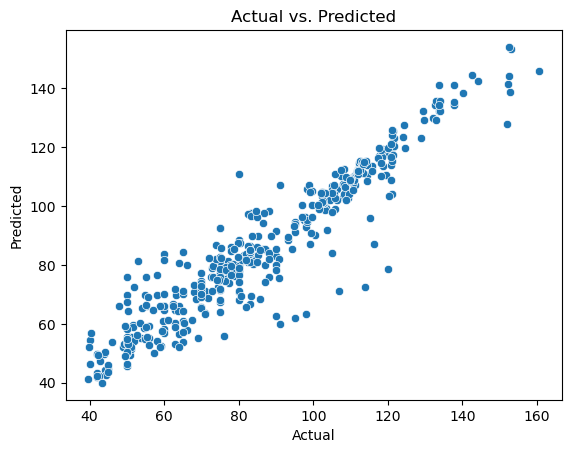

In [33]:
actual_vs_predicted(y_test, y_pred4)

In [34]:
# get some metrics - Polynomial Regression Model
evaluate_the_model(y_test, y_pred4)

Mean Absolute Error (MAE) 5.62:
Mean Squared Error (MSE) 75.84:
Root Mean Squared Error (RMSE) 8.71:
R-squared Score (R^2) 0.89:
Mean Absolute Percentage Error (MAPE) 7.44:


# Hyperparameter Tuning

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Define the search space
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

# Define the search space
param_grid = { 
    "colsample_bytree": [0.3, 0.5, 0.8],
    "reg_alpha": [0, 0.5, 1, 5],
    "reg_lambda": [0, 0.5, 1, 5],
    "n_estimators": [50, 100, 500],
    "learning_rate": [0.1, 0.01, 0.001],
    "random_state" : [42]
}

scoring = "neg_root_mean_squared_error"


# Set up the k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# Define the XGBRegressor
xgb_regressor = XGBRegressor(objective='reg:squarederror')  # objective='reg:squarederror' for regression

# Define grid search
grid_search = GridSearchCV(estimator=xgb_regressor, 
                           param_grid=param_grid, 
                           scoring = scoring,
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)

# Fit grid search
grid_result = grid_search.fit(X_train, y_train)

# Print grid search summary
print('Best Hyperparameters:', grid_result.best_params_)


Best Hyperparameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 42, 'reg_alpha': 5, 'reg_lambda': 0}


In [45]:
xgb_regressor = xgb.XGBRegressor(**{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 42, 'reg_alpha': 5, 'reg_lambda': 0,  "random_state": 42 })

# running on the training data
xgb_regressor.fit(X_train,y_train)

y_pred5 = xgb_regressor.predict(X_test)
# get some metrics - Polynomial Regression Model - hyper-tuned
evaluate_the_model(y_test, y_pred5)

Mean Absolute Error (MAE) 5.43:
Mean Squared Error (MSE) 66.83:
Root Mean Squared Error (RMSE) 8.17:
R-squared Score (R^2) 0.91:
Mean Absolute Percentage Error (MAPE) 7.26:


# Random Forest

In [37]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators=100,random_state=0)

# fit the regressor with x and y data
regressor.fit(X_train, y_train)

# Once the model is trained, you can use it to make predictions on new data
y_pred6 = regressor.predict(X_test)

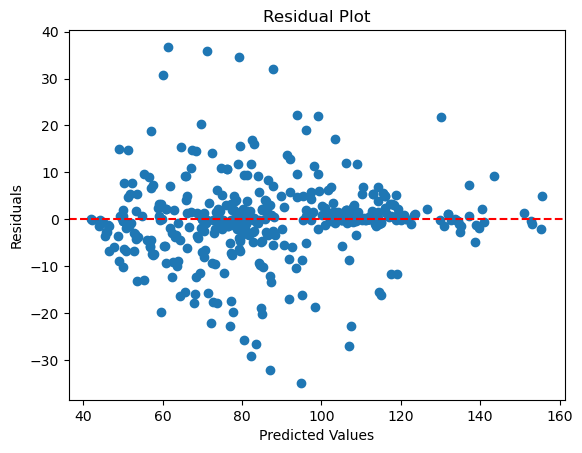

In [38]:
# Scatter plot of predicted values vs. residuals

residuals6 = y_test - y_pred6
display_residualplot(residuals6, y_pred6)

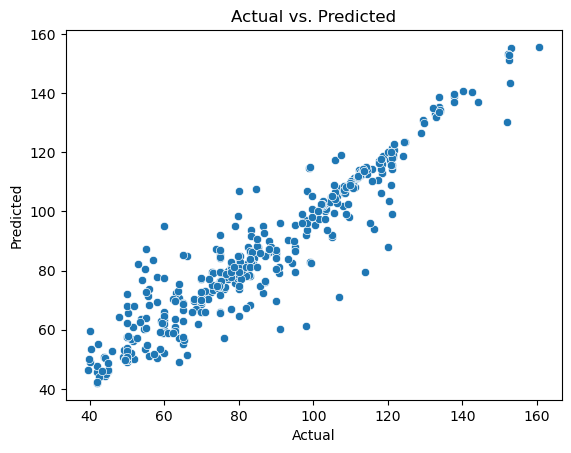

In [39]:
actual_vs_predicted(y_test, y_pred6)

In [44]:
# get some metrics - Polynomial Regression Model
evaluate_the_model(y_test, y_pred6)

Mean Absolute Error (MAE) 5.32:
Mean Squared Error (MSE) 74.00:
Root Mean Squared Error (RMSE) 8.60:
R-squared Score (R^2) 0.90:
Mean Absolute Percentage Error (MAPE) 7.26:


# Hyperparameter tuning

In [48]:
regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the search space
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Set up the k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# Define the RandomForestRegressor
rf_regressor = RandomForestRegressor()

# Define grid search
grid_search = GridSearchCV(estimator=rf_regressor, 
                           param_grid=param_grid, 
                           n_jobs=-1, 
                           cv=kfold,  
                           verbose=0)

# Fit grid search
grid_result = grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_result.best_params_)

# Print the best score
print("Best score found: ", grid_result.best_score_)

# You can also access other attributes of the grid search object
# For example, you can print the mean test score for all the parameter combinations
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
# for mean, param in zip(means, params):
#     print("Mean:", mean, "Parameters:", param)


Best parameters found:  {'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}
Best score found:  0.8277434273530911


In [51]:
from sklearn.ensemble import RandomForestRegressor
best_params = {
    'bootstrap': True,
    'max_depth': 100,
    'max_features': 3,
    'min_samples_leaf': 3,
    'min_samples_split': 8,
    'n_estimators': 1000
}

# Initialize the Random Forest regressor with the best parameters
rf_regressor = RandomForestRegressor(bootstrap=best_params['bootstrap'], 
                                     max_depth=best_params['max_depth'],
                                     max_features=best_params['max_features'], 
                                     min_samples_leaf=best_params['min_samples_leaf'],
                                     min_samples_split=best_params['min_samples_split'],
                                     n_estimators=best_params['n_estimators'])

# Fit the model to your training data
rf_regressor.fit(X_train, y_train)

# Once the model is trained, you can use it to make predictions on new data
y_pred7 = rf_regressor.predict(X_test)


In [47]:
# get some metrics - Polynomial Regression Model
evaluate_the_model(y_test, y_pred7)

Mean Absolute Error (MAE) 7.63:
Mean Squared Error (MSE) 104.84:
Root Mean Squared Error (RMSE) 10.24:
R-squared Score (R^2) 0.85:
Mean Absolute Percentage Error (MAPE) 9.94:


# RandomCV hypertuning

In [57]:
from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

# Fit grid search
grid_result_random = grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_result_random.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}


In [60]:

best_params = {
    'bootstrap': True,
    'max_depth': 90,
    'max_features': 3,
    'min_samples_leaf': 3,
    'min_samples_split': 8,
    'n_estimators': 200
}

# Initialize the Random Forest regressor with the best parameters
rf_regressor = RandomForestRegressor(bootstrap=best_params['bootstrap'], 
                                     max_depth=best_params['max_depth'],
                                     max_features=best_params['max_features'], 
                                     min_samples_leaf=best_params['min_samples_leaf'],
                                     min_samples_split=best_params['min_samples_split'],
                                     n_estimators=best_params['n_estimators'])

# Fit the model to your training data
rf_regressor.fit(X_train, y_train)

# Once the model is trained, you can use it to make predictions on new data
y_pred8 = rf_regressor.predict(X_test)
# get some metrics - Polynomial Regression Model
evaluate_the_model(y_test, y_pred7)

Mean Absolute Error (MAE) 8.01:
Mean Squared Error (MSE) 107.97:
Root Mean Squared Error (RMSE) 10.39:
R-squared Score (R^2) 0.85:
Mean Absolute Percentage Error (MAPE) 10.44:
